In [2]:
import os 
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as patches

In [3]:
ex_list = []
ex_list.append('GT')
for j in sorted([i for i in os.listdir() if 'Infer' in i]):
    ex_list.append(j) 

In [4]:
ex_list

['GT', 'Infer_e1', 'Infer_e2', 'Infer_e3', 'Infer_e4', 'Infer_e5']

In [189]:
# fname = 'LISA_0005_ciso.nii.gz'
# raw_img = 'nnUNet_raw/Dataset888_Lisa/imagesTr/'

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import ipywidgets as widgets
from IPython.display import display

fname = 'LISA_0048_ciso.nii.gz'
raw_img = 'nnUNet_raw/Dataset888_Lisa/imagesTr/'
# 加载图像数据
raw_path = os.path.join(raw_img, fname.split('ciso')[0] + 'ciso_0000.nii.gz')
raw_data = np.rot90(nib.load(raw_path).get_fdata())
_, _, d = raw_data.shape

# 创建滑动条用于选择放大区域
x_start = widgets.IntSlider(value=70, min=0, max=raw_data.shape[0]-1, description='X Start:')
x_end = widgets.IntSlider(value=150, min=0, max=raw_data.shape[0], description='X End:')
y_start = widgets.IntSlider(value=60, min=0, max=raw_data.shape[1]-1, description='Y Start:')
y_end = widgets.IntSlider(value=130, min=0, max=raw_data.shape[1], description='Y End:')
slice_idx = widgets.IntSlider(value=d//2, min=0, max=d-1, description='Slice Index:')

# 显示原始图像和放大图像的函数
def show_images(x_start_val, x_end_val, y_start_val, y_end_val, slice_idx_val):
    fig, axes = plt.subplots(1, len(ex_list) + 1, figsize=(20, 10))

    # 显示原始图像
    axes[0].imshow(raw_data[:, :, slice_idx_val], cmap='gray')
    axes[0].set_title('Raw Image')
    axes[0].axis('off')

    for idx, file in enumerate(ex_list):
        path = os.path.join(file, fname)
        data = np.rot90(nib.load(path).get_fdata())

        alpha_mask = np.where(data[:, :, slice_idx_val] == 0, 0, 1).astype(np.float32)

        # 显示原始图像的放大区域
        axes[idx + 1].imshow(raw_data[x_start_val:x_end_val, y_start_val:y_end_val, slice_idx_val], cmap='gray')
        
        # 显示标签图像的放大区域
        axes[idx + 1].imshow(data[x_start_val:x_end_val, y_start_val:y_end_val, slice_idx_val], cmap='Reds', alpha=alpha_mask[x_start_val:x_end_val, y_start_val:y_end_val])
        
        axes[idx + 1].set_title(file)
        axes[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

# 交互式显示
widgets.interactive(show_images, 
                    x_start_val=x_start, 
                    x_end_val=x_end, 
                    y_start_val=y_start, 
                    y_end_val=y_end, 
                    slice_idx_val=slice_idx)


interactive(children=(IntSlider(value=70, description='X Start:', max=232), IntSlider(value=150, description='…

In [41]:
def compute_tp_fp_fn_tn(mask_ref, mask_pred):
        use_mask = mask_ref  
        tp = np.sum((mask_ref & mask_pred) & use_mask)
        fp = np.sum(((~mask_ref) & mask_pred) & use_mask)
        fn = np.sum((mask_ref & (~mask_pred)) & use_mask)
        tn = np.sum(((~mask_ref) & (~mask_pred)) & use_mask)
        return tp, fp, fn, tn
    
def Dice(ex_list,fname): 
    Dice = 0 
    Dice_list = []
    for i in ex_list[:-1]:
        pre_mask = np.array(nib.load(os.path.join(i,fname)).get_fdata().astype(bool))
        ori_mask = np.array(nib.load(os.path.join(ex_list[-1],fname)).get_fdata().astype(bool))
        tp, fp, fn, tn = compute_tp_fp_fn_tn(ori_mask, pre_mask)
        dice = 2 * tp / (2 * tp + fp + fn) # 
        Dice_list.append(f"{i}:{dice}")
  
    return Dice_list

/tmp/ipykernel_585313/2475691059.py:36: RuntimeWarning: invalid value encountered in divide
  mask_colored = plt.cm.jet(mask_img / np.max(mask_img))  # 使用jet色图并标准化mask值


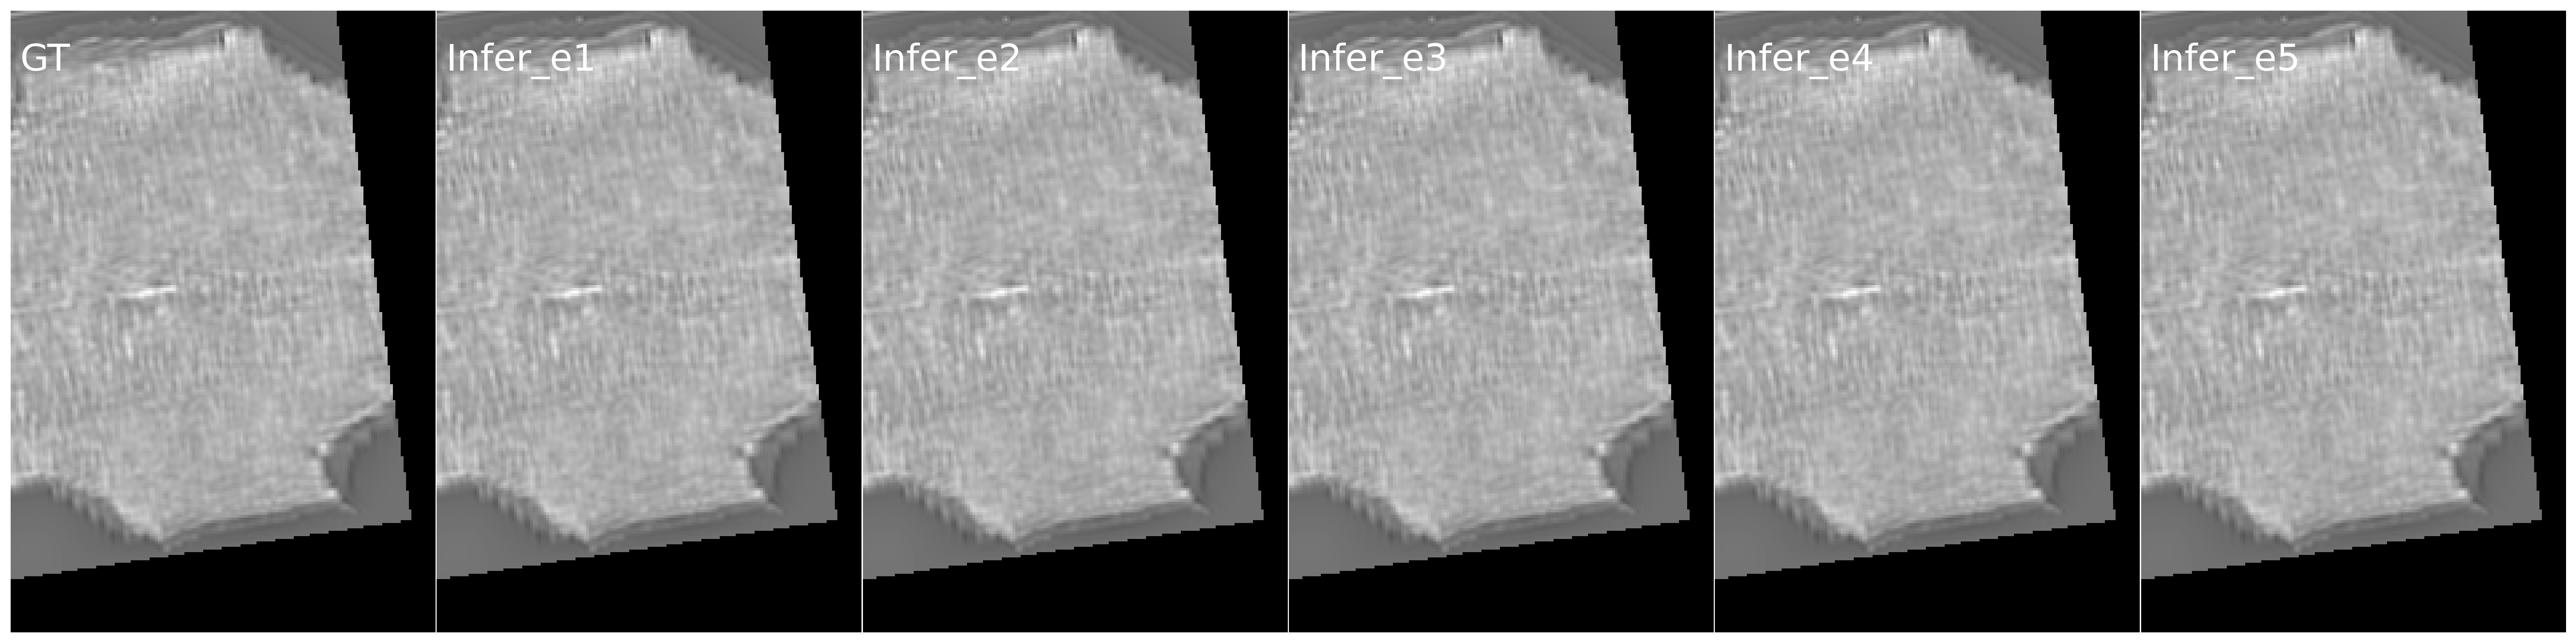

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nibabel as nib
import cv2

raw_img_folder = 'nnUNet_raw/Dataset888_Lisa/imagesTr/'
mask_folders = ex_list

ROI_X = 75
ROI_Y = 100
ROI_LEN = 40
Slice = 30

def load_image(path):
    img = nib.load(path).get_fdata()
    return img

# 选择要显示的图像索引
i = 5  

fig, ax_array = plt.subplots(1, 6, figsize=(24, 6), dpi=300)

for icontrast, mask_folder in enumerate(mask_folders):
    fname = f'LISA_00{i:02d}_ciso.nii.gz'  
    raw_path = os.path.join(raw_img_folder, fname.split('ciso')[0] + 'ciso_0000.nii.gz')
    
    raw_img = np.rot90(load_image(raw_path))[:,Slice,:]
    mask_path = os.path.join(mask_folder, fname)
    mask_img = np.rot90(load_image(mask_path))[:,Slice,:]

    ax = ax_array[icontrast]
    ax.imshow(raw_img, cmap='gray')

    mask_colored = plt.cm.jet(mask_img / np.max(mask_img))  # 使用jet色图并标准化mask值
    mask_colored[..., -1] = mask_img > 0  # 透明度设置，mask区域为不透明

    ax.imshow(mask_colored, alpha=1)  # 设置mask透明度

    ax.text(3, 22, os.path.basename(mask_folder), color='w', fontsize=25)

    ax.axis('off')

plt.tight_layout(pad=0.1)
plt.show()


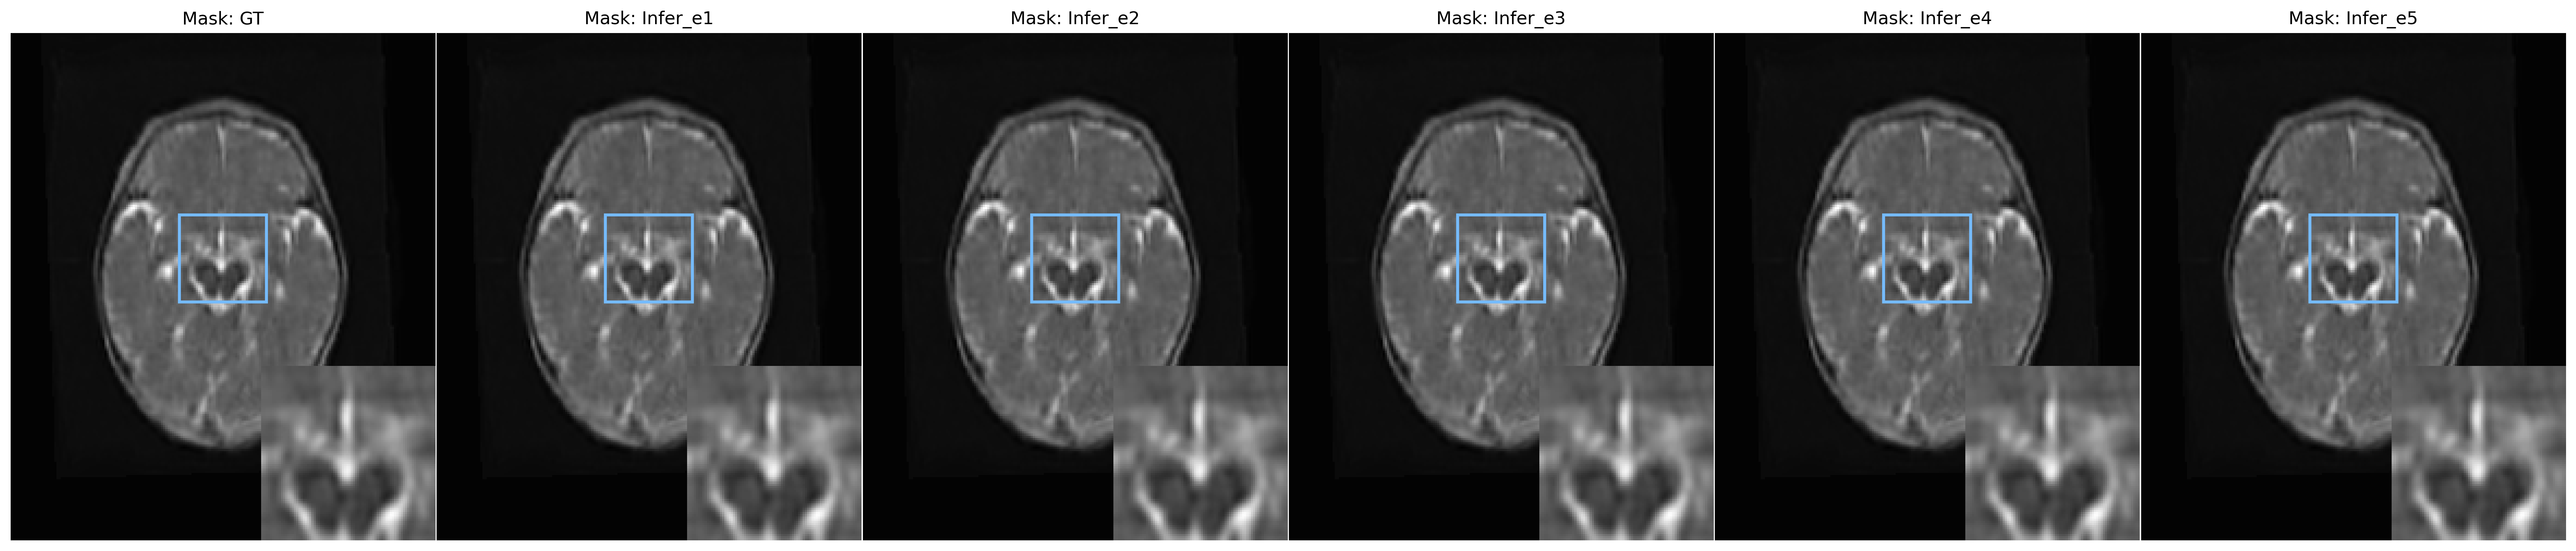

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nibabel as nib
import cv2

# 文件夹路径设置
raw_img_folder = 'nnUNet_raw/Dataset888_Lisa/imagesTr/'
mask_folders = ex_list

# ROI参数
ROI_X = 77
ROI_Y = 83
ROI_LEN = 40

# slice参数
Slice = 60

# 读取原始数据和mask
def load_image(path):
    img = nib.load(path).get_fdata()
    return img

# 选择要显示的图像索引
i = 5  # 可以更改索引以显示不同的图像

# 创建图形和轴（1行6列）
fig, ax_array = plt.subplots(1, 6, figsize=(24, 6), dpi=300)

# 读取和绘制图像
for icontrast, mask_folder in enumerate(mask_folders):
    fname = f'LISA_00{i:02d}_ciso.nii.gz'  # 根据需要更改文件名
    raw_path = os.path.join(raw_img_folder, fname.split('ciso')[0] + 'ciso_0000.nii.gz')
    
    raw_img = np.rot90(load_image(raw_path))[:,:,Slice]
    mask_path = os.path.join(mask_folder, fname)
    mask_img = np.rot90(load_image(mask_path))[:,:,Slice]

    # 显示原始图像
    ax = ax_array[icontrast]
    ax.imshow(raw_img, cmap='gray', alpha=1.0)

    # 伪彩色mask叠加
    mask_colored = np.zeros((*mask_img.shape, 3))  # 创建一个空的RGB图像
    mask_colored[mask_img > 0] = [1, 0, 0]  # 将mask区域设置为红色 (R=1, G=0, B=0)
    
    ax.imshow(mask_colored, alpha=0.5)  # 设置mask透明度

    # 创建局部放大
    roi = raw_img[ROI_Y:ROI_Y + ROI_LEN, ROI_X:ROI_X + ROI_LEN]
    roi_enlarge = cv2.resize(roi, (ROI_LEN * 2, ROI_LEN * 2), interpolation=cv2.INTER_CUBIC)

    # 在原始图像上添加放大区域
    raw_img[-ROI_LEN * 2:, -ROI_LEN * 2:] = roi_enlarge

    # 显示放大区域
    ax.imshow(raw_img, cmap='gray')

    # 添加ROI矩形
    rect = patches.Rectangle((ROI_X, ROI_Y), ROI_LEN, ROI_LEN, linewidth=2, edgecolor='xkcd:sky blue', facecolor='none')
    ax.add_patch(rect)

    # 添加标题
    ax.set_title(f'Mask: {os.path.basename(mask_folder)}')
    ax.axis('off')

plt.tight_layout(pad=0.1)
plt.show()


In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2

fname = 'LISA_0026_ciso.nii.gz'
raw_img_folder = 'nnUNet_raw/Dataset888_Lisa/imagesTr/'
mask_folders = ex_list

ROI_X = 93
ROI_Y = 80
ROI_LEN = 40
Slice = 123
def load_image(path):
    img = nib.load(path).get_fdata()
    return img

def center_crop(image, crop_h_rate, crop_w_rate):
    # 获取图像的中心坐标
    h, w = image.shape[:2]
    center_h, center_w = h // 2, w // 2

    # 计算裁剪区域的边界
    crop_h = int(crop_h_rate * h)
    crop_w = int(crop_w_rate * w)
    
    start_h = max(center_h - crop_h // 2, 0) 
    start_w = max(center_w - crop_w // 2, 0)
    end_h = min(start_h + crop_h, h) 
    end_w = min(start_w + crop_w, w)

    # 裁剪图像
    return image[start_h:end_h, start_w:end_w]
       

fig, ax_array = plt.subplots(1, 6, figsize=(24, 24), dpi=1080)

for icontrast, mask_folder in enumerate(mask_folders): 
    raw_path = os.path.join(raw_img_folder, fname.split('ciso')[0] + 'ciso_0000.nii.gz')
    
    raw_img = np.rot90(np.rot90(load_image(raw_path))[:,Slice,:])
    mask_path = os.path.join(mask_folder, fname)
    mask_img = np.rot90(np.rot90(load_image(mask_path))[:,Slice,:])

    raw_img_normalized = ((raw_img- raw_img.min()) / (raw_img.max() - raw_img.min())) * 255
    rgb_image = np.stack([raw_img_normalized] * 3, axis=-1).astype(np.uint8)
    rgb_image[mask_img == 1] = [255, 0, 0]
    rgb_image[mask_img == 2] = [0, 255, 0]

    ax = ax_array[icontrast]
    ax.imshow(rgb_image)  

    roi = rgb_image[ROI_Y:ROI_Y + ROI_LEN, ROI_X:ROI_X + ROI_LEN]
    roi_enlarge = cv2.resize(roi, (ROI_LEN * 2, ROI_LEN * 2), interpolation=cv2.INTER_CUBIC)
    
    rgb_image[-ROI_LEN * 2:, -ROI_LEN * 2:] = roi_enlarge
    ax.imshow(rgb_image, cmap='gray')

    rect = patches.Rectangle((ROI_X, ROI_Y), ROI_LEN, ROI_LEN, linewidth=2, edgecolor='xkcd:sky blue', facecolor='none')
    ax.add_patch(rect)

   
    # ax.text(3, 22, os.path.basename(mask_folder), color='w', fontsize=25)

    ax.axis('off')


plt.tight_layout(pad=0.1)
plt.savefig(f"{fname.split('_')[1]}_#{Slice}", bbox_inches='tight', pad_inches=0.1)
plt.show()



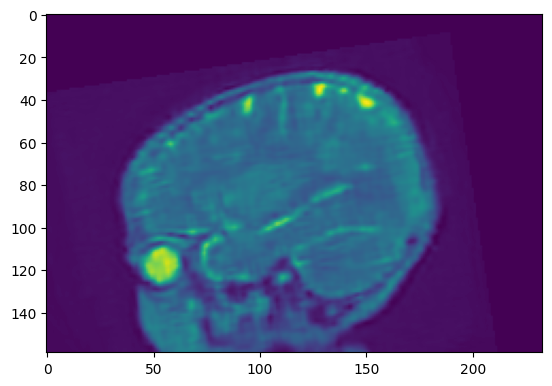

In [107]:
plt.imshow(raw_img)